# Evaluating K-Means Clusters with the Iris Dataset

---

KNN will be performed to the iris dataset in order to obtain the different species.
It is know that this dataset has 3 species, but what do we do if we don't have this information. How do we pick the correct number of clusters.

Few clusters will have bias error. Extra clusters, however, can cause to overfit.

In [17]:
# import libraries
import pandas as pd
import numpy as np
from sklearn import cluster, metrics
from sklearn import datasets
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline 
matplotlib.style.use('ggplot') 

In [18]:
# Load data
iris = datasets.load_iris()

In [19]:
# Set up target variables
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target
y_names = iris.target_names

# Visualize
df = pd.concat([X,pd.Series(y, name='target')],axis=1)
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [20]:
from sklearn.cluster import KMeans

# Lets fit it first with the correct number of clusters
km = KMeans(n_clusters=3)
km.fit(X,y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [21]:
# Save clusters information
centers = km.cluster_centers_
labels = km.labels_
df['predicted'] = labels

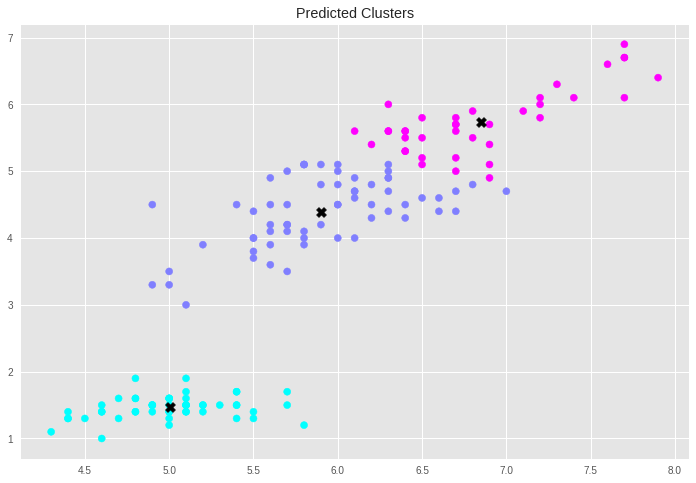

In [24]:
# Let's plot sepal length vs petal length nad visualize the clusters
plt.figure(figsize=(12,8))
plt.scatter(df['sepal length (cm)'], df['petal length (cm)'], c=df['predicted'], cmap='cool')

# Plot the centroids
for i in range(3):
    plt.scatter(centers[i,0], centers[i,2], c='black' ,marker='X', s=100)
    
plt.title("Predicted Clusters")

Looking at that plot, there appear to be two clusters.
Be aware that this is just two variables of the four.
What can we do when there are too many variables to visualize all and decide the number of clusters?

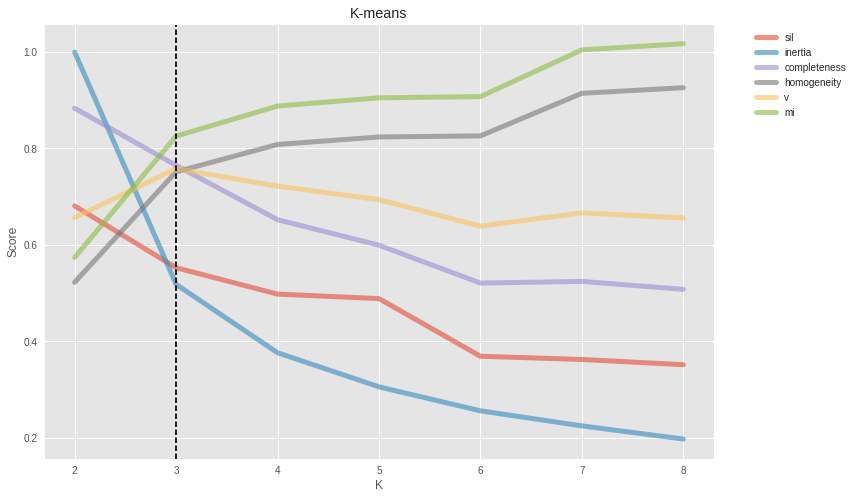

In [25]:
from sklearn.metrics import silhouette_score, completeness_score, homogeneity_score,\
v_measure_score, mutual_info_score
'''
Let's loop for k in range between 2 and 9. Let's store some metrics
    - Silhouette score: Measure of how similar an object is to its own cluster (cohesion) 
    compared to other clusters (separation). The silhouette ranges from -1 to 1.
    - Completeness score: Each cluster contains only members of a single class.
    - Homogeneity score: All members of a given class are assigned to the same cluster.
    - V measure: Harmonic mean of completeness and homogeneity
    - Inertia: Within-cluster sum-of-squares
    - Mutual information: Measure of the mutual dependence between the two variables
'''
plt.figure(figsize=(12,8))

sc = []
inertia = []
completeness = []
homogeneity = []
v = []
mi = []
for k in range(2,9):
    km = KMeans(n_clusters=k)
    km.fit(X,y)
    sc.append(silhouette_score(X, km.labels_))
    inertia.append(km.inertia_)
    completeness.append(completeness_score(y, km.labels_))
    homogeneity.append(homogeneity_score(y, km.labels_))
    v.append(v_measure_score(y, km.labels_))
    mi.append(mutual_info_score(y, km.labels_))
    
plt.plot(range(2,9), sc, label='sil', linewidth=5, alpha = 0.6)
plt.plot(range(2,9), inertia/max(inertia), label='inertia', linewidth=5, alpha = 0.6)
plt.plot(range(2,9), completeness, label='completeness', linewidth=5, alpha = 0.6)
plt.plot(range(2,9), homogeneity, label='homogeneity', linewidth=5, alpha = 0.6)
plt.plot(range(2,9), v, label='v', linewidth=5, alpha = 0.6)
plt.plot(range(2,9), mi, label='mi', linewidth=5, alpha = 0.6)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.title("K-means")
plt.xlabel("K")
plt.ylabel("Score")

ax = plt.gca()
ax.axvline(x=3, linestyle='--', color= 'black')

We can see how completeness and homogeneity decrease and increase respectively. The maximum V score gives us the harmonic mean, which is maximum for k = 3.
On other hand, we want to maximize the Mutual information, but we also want to maximize the silhouette score. For this, we have to take some point in between. k betwwen 3 and 5 seems reasonable.
Lastly, the inertia decreases as we increase k. Using the elbow criteria, we look for a k where k + 1 doesn't decrease significally. k = 3 and 4 fit this criteria.

Combining all results, we see that 3 seems to be the best choice!